# кривые PR и ROC для оценки моделей классификации

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report

Начнем с получение датасета для бинарной классификации.

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

Разделим выборку на обучающую и тестовую.поделим датасет пополам, хотя на практике такая пропорция не используется:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

Логистическая регрессия, наряду со многими другими моделями классификации может работать как точечный предиктор (то есть выдавать для входного объекта наиболее вероятный класс), а может - как вероятностный (то есть для данного объекта выдавать оценки вероятности принадлежности к каждому классу, который присутствует в обучающей выборке).

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba[:7]

array([[0.00402732, 0.99597268],
       [0.00200516, 0.99799484],
       [0.99470117, 0.00529883],
       [0.84762581, 0.15237419],
       [0.00166665, 0.99833335],
       [0.49993855, 0.50006145],
       [0.98023686, 0.01976314]])

Для каждого объекта в матрице указано два значения - вероятности его отнесения, по мнению модели, соответственно, к отрицательному и положительному классу. Так как задача у нас бинарная, можно заметить, что эти два числа всегда дают в сумме единицу.
ля множественной классификации, это не обязательно выполняется.

Для построения кривой ROC используем встроенную в sklearn функцию roc_curve, которая находится в пакете metrics:

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

Данная функция возвражает три массива: значения метрики FPR (false positive rate), TPR (true positive rate) и значение порога. (значений порога (в промежутке от 0 до 1))

первые два массива мы используем для построения графика - того самомго ROC:

Здесь мы значала рисуем прямую между точками (0,0) и (1, 1) - это референсная линия, которая представляет условный тривиальный классификатор. Именно с ней мы будем сравнивать получившуюся кривую, А она должна распологаться примено так:

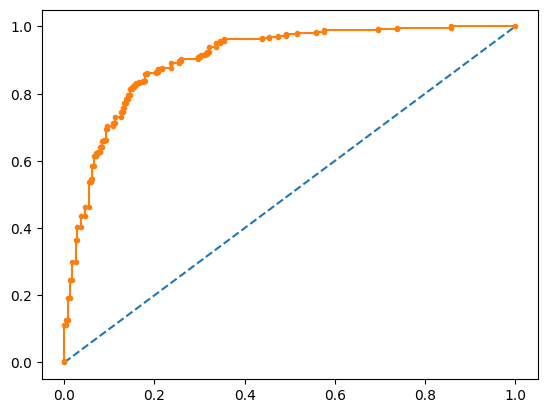

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Из графика мы видим, что кривая находится выше прямой, что свидетельствует о том, что классификатор работает лучше, чем случайное предсказание.

Боле четкую оценку даст метрика ROC-AUC, измеряющая площадь под графиком данной кривой.

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

Давайте по аналогии построим график PR-кривой.

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])


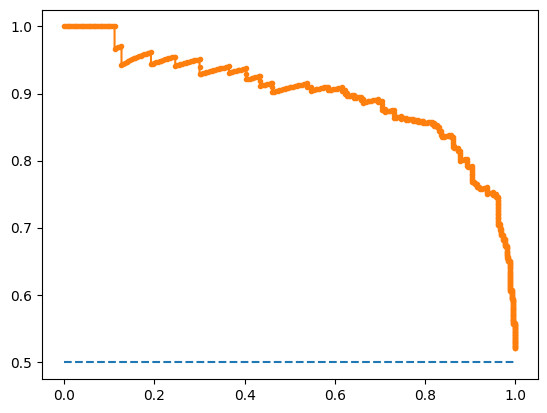

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)#численная метрика.  Еще это число называют средней точностью модели - average precision.

0.8977244980325834

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Важно понимать, что данный отчет характеризует поведение модели только в одной точке - при значении порога, равном по умолчанию 0,5. Кривые же показывают, как модель будет работать при все возможных значениях порога.

Давайте для сравнения попробуем обучить на этих же данных другую модель. Например, метод ближайших сосдей

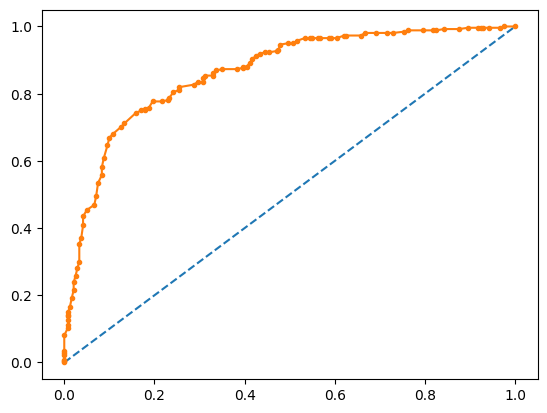

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [ ]:
precision1, recall1, _ = precision_recall_curve(y_test, y_pred2_proba[:, 1])

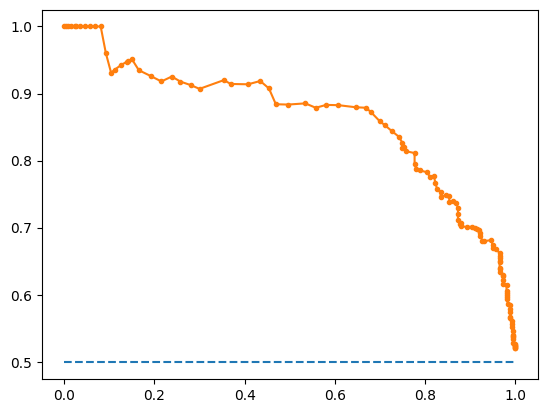

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall1, precision1, marker='.')
plt.show()

In [ ]:
auc(recall1, precision1)

0.864138209558263

## Дизбаланс классов

Наиболее явно различия между этими двумя классификационными кривыми - ROC и PR - демонстрирует пример с большим дизбалансом классов.

датасет, в котором объектов разных классов не примерно равное количество, как в предыдущем примере, а объектов отрицательного класса, скажем, 99%.

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)


In [ ]:
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))


Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [ ]:
X_train

array([[-0.06428161, -0.32317353, -0.69289713, ...,  0.7590643 ,
        -0.50059747, -0.99277729],
       [ 1.87872646, -0.49965733, -1.52953056, ...,  1.33783838,
        -0.08877341, -1.59372923],
       [ 1.40594868,  0.0244462 , -0.81209706, ..., -0.82185945,
        -1.12376431,  1.4690611 ],
       ...,
       [-0.10923548,  1.62413625,  0.18820036, ...,  0.0943998 ,
         0.17168299, -0.07118176],
       [ 1.35198629, -0.52528887,  0.13081577, ...,  1.02834532,
        -0.88951075, -0.55355414],
       [ 1.38643752, -0.63346978, -0.50011746, ..., -0.46279636,
         1.1895081 ,  1.0557548 ]])

Видно, что в одной половине выборки положительных объектов в два раза больше, чем в другой.  мы можем случайно получить выборку, в которой какие-то классы не представлены вообще. Для предотвращения таких случаев нужно воспользоваться стратификацией:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

Это агрумент следит за тем, чтобы в обоих частях выборки распределение переданного атрибута было примерно такое же, как и целом датасете.

In [ ]:
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=493, Class1=7
Тестовая: Class0=492, Class1=8


In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))#Сразу познакомимся с дефолтным поведением модели, построив отчет о классификации

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Мажоритарный класс (в данном случае - отрицательный, он у нас в большинстве) распознается очень хорошо, а миноритарный - очень плохо. В нашем случае, вообще по положительному классу все метрики нулевые. Но обратите внимание, что общая точность (accuracy) модели весьма приемлема - 98%. Дизбаланс классов "скрывает" в точности недостатки работы модели.

Построим ROC

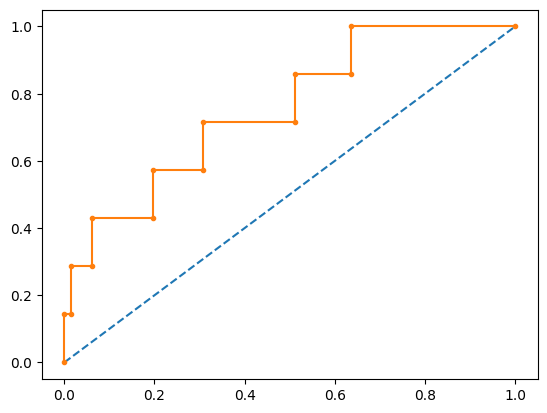

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
auc(fpr, tpr)

0.753404810199942

построим кривую PR

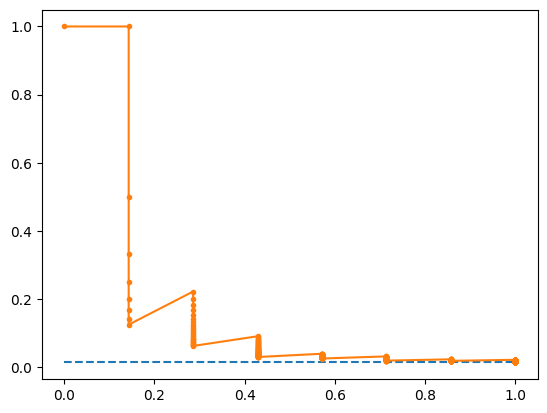

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

0.193651305516256

именно PR-кривая дает более реалистические оценки эффективности работы моделей классификации на таких данных, где наблюдается большой дисбаланс классов.

## Выбор значения порога по кривым

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

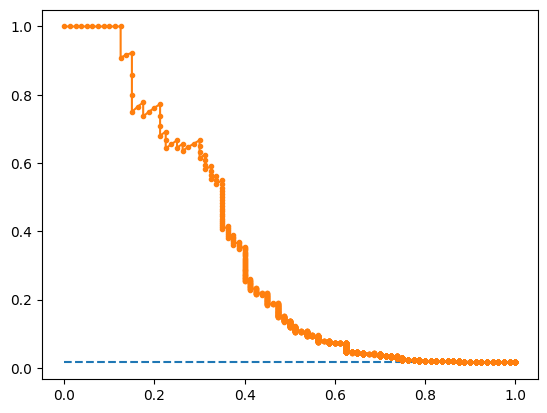

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
from numpy import argmax

Вычислим вектор метрик F1 при всех использованных значениях порога и найдем самое большое значение среди них (вернее, его индекс):

In [ ]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

0.1899251965147765

Так как индексы всех массивов, возвращенных функцией precision_recall_curve соответственны, по этому индексу получим значение порога и соответствующее ему значение метрики F1:



In [ ]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.189925, F-Score=0.427


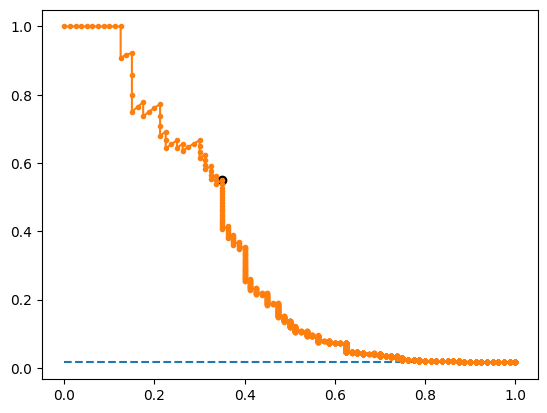

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

Давайте используем данное значение порога для проведение непосредственной классификации

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.54      0.34      0.42        80

    accuracy                           0.98      5000
   macro avg       0.76      0.67      0.70      5000
weighted avg       0.98      0.98      0.98      5000



In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.80      0.15      0.25        80

    accuracy                           0.99      5000
   macro avg       0.89      0.57      0.62      5000
weighted avg       0.98      0.99      0.98      5000



# Задания для самостоятельного выполнения

### Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

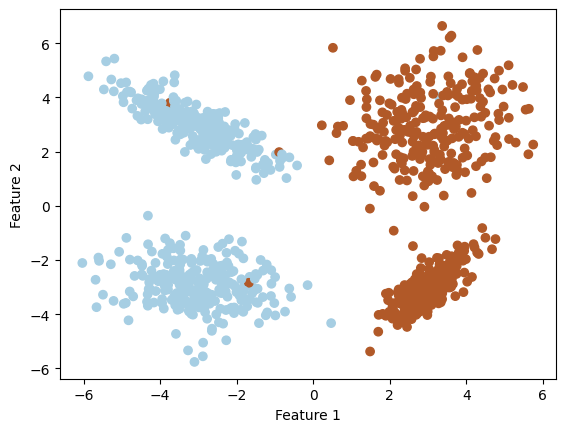

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[1.31169913e-02, 9.86883009e-01],
       [7.67053625e-03, 9.92329464e-01],
       [4.71307549e-02, 9.52869245e-01],
       [9.99114783e-01, 8.85216545e-04],
       [5.20575206e-03, 9.94794248e-01],
       [4.34269069e-03, 9.95657309e-01],
       [9.80552769e-01, 1.94472311e-02],
       [9.99977627e-01, 2.23725117e-05],
       [1.89629593e-03, 9.98103704e-01],
       [4.57223106e-03, 9.95427769e-01],
       [5.56168073e-03, 9.94438319e-01],
       [9.99434096e-01, 5.65904126e-04],
       [9.76531757e-01, 2.34682433e-02],
       [1.60651809e-04, 9.99839348e-01],
       [1.35596513e-04, 9.99864403e-01],
       [2.20744630e-02, 9.77925537e-01],
       [1.74253960e-03, 9.98257460e-01],
       [5.36201102e-04, 9.99463799e-01],
       [2.86970471e-03, 9.97130295e-01],
       [2.37953813e-03, 9.97620462e-01],
       [9.30068559e-01, 6.99314408e-02],
       [6.80938797e-03, 9.93190612e-01],
       [9.99696661e-01, 3.03339072e-04],
       [1.33252453e-03, 9.98667475e-01],
       [1.407381

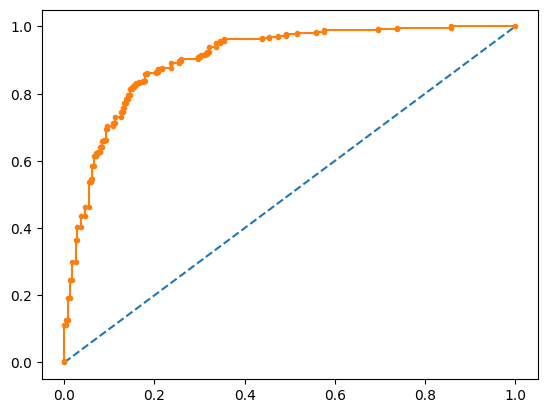

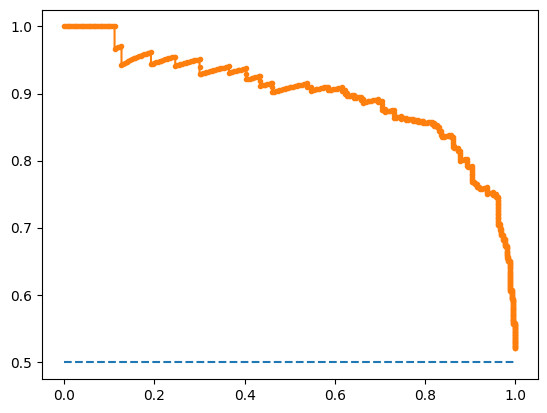

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
def draw_border(X, threshold=[0.1, 0.365, 0.5, 0.6789, 0.9]):
  for thr in threshold:
    xx, yy = np.meshgrid(
        np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.01),
        np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.01))
    XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
    XX = np.array([(*xx,) for xx in XX])

    y_pred_thr2 = (model.predict_proba(XX)[:, 1] > thr).astype('int')
    Z = y_pred_thr2.reshape(xx.shape)

    plt.title(f'Значение порога {thr}')
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="+", c='b', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="*", c='indigo', s=100)
    plt.show()

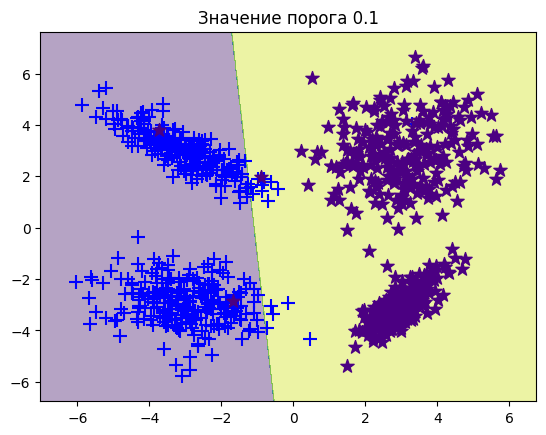

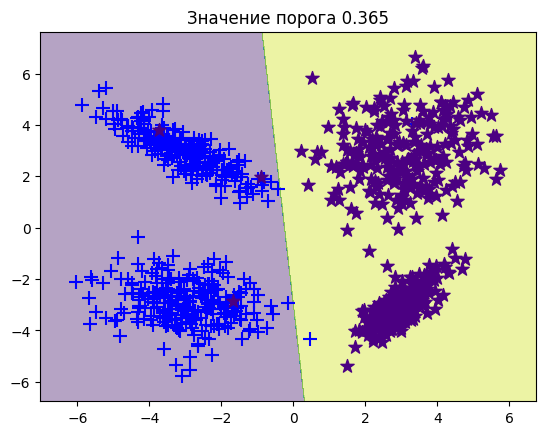

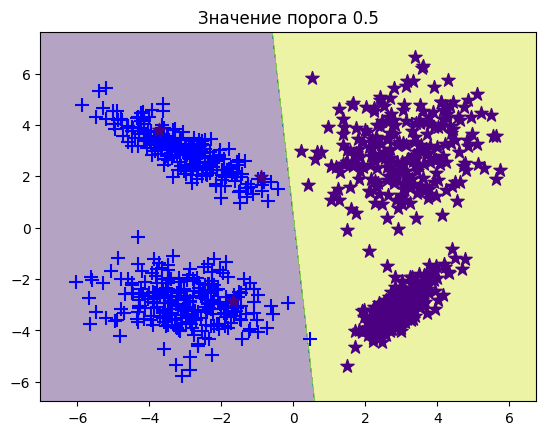

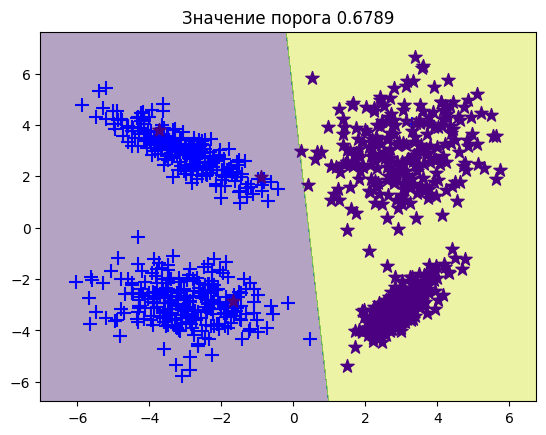

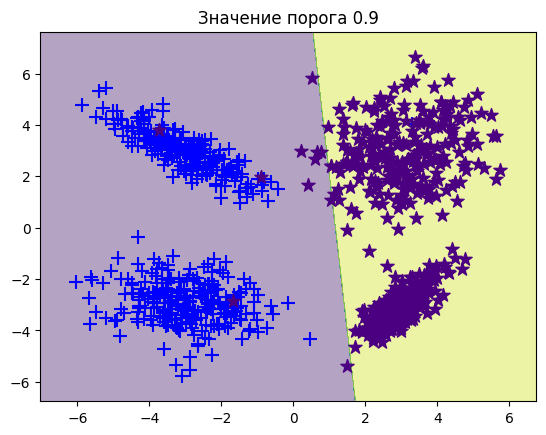

In [ ]:
draw_border(X)

### Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/uestc-chensp/datasets/master/banknote/banknote.csv')

In [ ]:
data

,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,1
1,4.54590,8.16740,-2.4586,-1.46210,1
2,3.86600,-2.63830,1.9242,0.10645,1
3,3.45660,9.52280,-4.0112,-3.59440,1
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2


In [ ]:
df = pd.DataFrame(data=data)

In [ ]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
X = df.drop(['Class'],axis = 1)
y = data['Class']

In [ ]:
type(X)

numpy.ndarray

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 20), (200,), (800, 20), (800,))

In [ ]:
x_train

array([[ 1.00169832, -1.23573691, -0.64126288, ...,  0.24549568,
         0.83207224, -0.73918833],
       [ 1.761707  , -1.07395972, -1.79828392, ..., -0.25647193,
        -0.62913514,  1.72192157],
       [ 1.24540194,  0.74621629,  1.48629738, ..., -0.47486457,
         0.12367763, -1.78190805],
       ...,
       [ 0.62186218,  0.3794435 ,  1.34459995, ...,  0.14881567,
         0.73540919, -0.7010282 ],
       [ 1.27434756, -0.06644818, -1.44255683, ...,  0.33412256,
         0.61644834, -0.72295939],
       [-1.86522918,  1.30357545,  0.17368027, ..., -0.19850032,
        -0.73203188, -2.00394177]])

In [ ]:
model = LogisticRegression().fit(x_train, y_train)

In [ ]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[1.75447595e-02, 9.82455240e-01],
       [9.99999325e-01, 6.75457524e-07],
       [9.99819552e-01, 1.80448385e-04],
       ...,
       [6.07446592e-02, 9.39255341e-01],
       [9.99996482e-01, 3.51776847e-06],
       [3.61365059e-03, 9.96386349e-01]])

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,0], pos_label=1)


In [ ]:
tpr

array([0.        , 0.00163399, 0.94281046, 0.95261438, 0.95588235,
       0.96078431, 0.9624183 , 0.96732026, 0.96895425, 0.97222222,
       0.97222222, 0.9754902 , 0.97712418, 0.97712418, 0.98039216,
       0.98039216, 0.98529412, 0.98529412, 0.9869281 , 0.99346405,
       0.99346405, 0.99836601, 1.        , 1.        ])

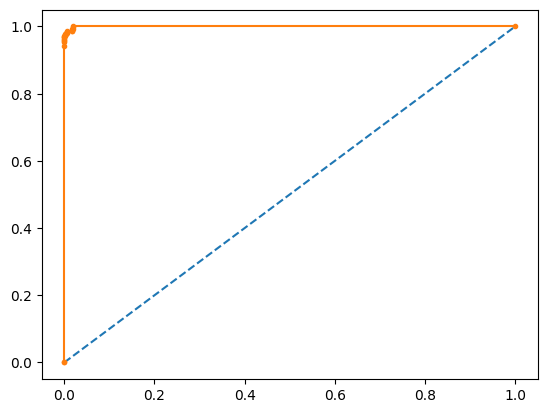

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9996906856020872

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 0], pos_label=1)

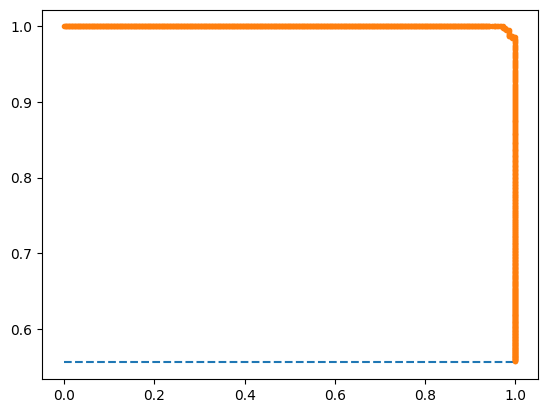

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

0.9997550260313866

In [ ]:
y_test_pred = model.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       612
           2       0.98      0.99      0.99       486

    accuracy                           0.99      1098
   macro avg       0.99      0.99      0.99      1098
weighted avg       0.99      0.99      0.99      1098



### В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred_test = model.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2493
           1       0.89      0.86      0.88      2507

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



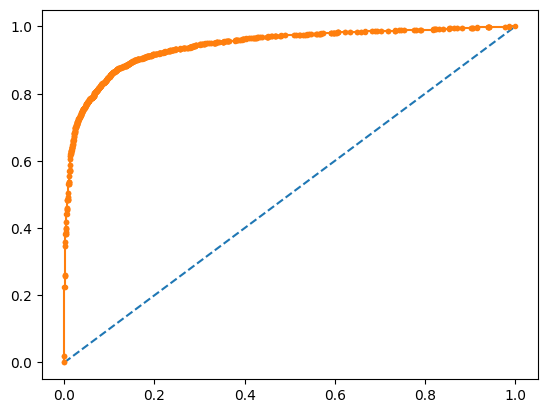

In [ ]:
fpr, tpr, pr_thresholds= roc_curve(y_test, y_pred_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
geometric_mean = np.sqrt(tpr * fpr)
ix = np.argmax(geometric_mean)

In [ ]:
print('Порог=%f,  Среднее геометрическое=%.3f' % (pr_thresholds[ix], geometric_mean[ix]))

Порог=0.000104,  Среднее геометрическое=1.000


In [ ]:
y_pred_n = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [ ]:
print(classification_report(y_test, y_pred_test))
print(f'ROC-AUC = {roc_auc_score(y_test, y_pred_test)}')

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2493
           1       0.89      0.86      0.88      2507

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

ROC-AUC = 0.8774477591904322


In [ ]:
print(classification_report(y_test, y_pred_n))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2493
           1       0.50      1.00      0.67      2507

    accuracy                           0.50      5000
   macro avg       0.75      0.50      0.33      5000
weighted avg       0.75      0.50      0.34      5000



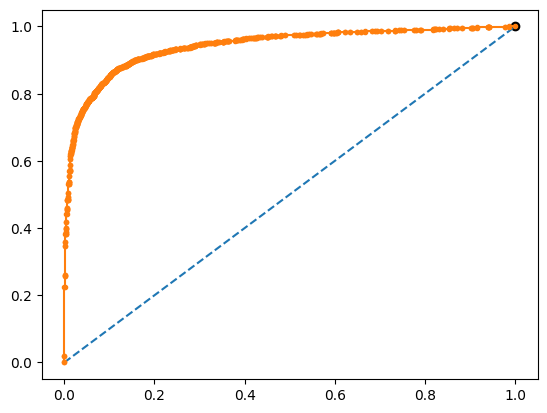

ROC-AUC = 0.5002005615724028


In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], color='black')
plt.show()

print(f'ROC-AUC = {roc_auc_score(y_test, y_pred_n)}')

### При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике.

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2,  random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred_test = model.predict(X_test)

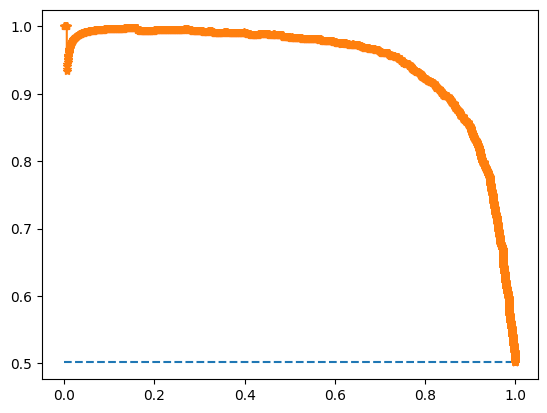

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='*')
plt.show()

In [ ]:
ix = np.argmax(p)
threshold_precision = pr_thresholds[ix]
pp = p[ix]
print('Порог=%f, precision=%.3f' % (threshold_precision, pp))

Порог=0.999880, precision=1.000


In [ ]:
y_pred_opt = (y_pred_proba[:, 1] > threshold_precision).astype('int')
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2494
           1       1.00      0.01      0.01      2506

    accuracy                           0.50      5000
   macro avg       0.75      0.50      0.34      5000
weighted avg       0.75      0.50      0.34      5000



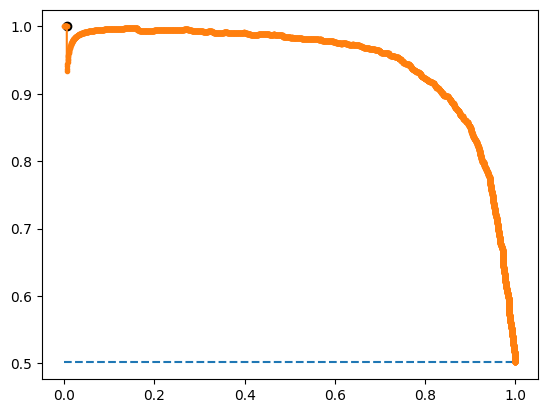

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], pp, marker='o', color='black')
plt.show()

In [ ]:
ix = np.argmax(r)
threshold_recall = pr_thresholds[ix]
rr = r[ix]
print('Порог=%f, recall=%.3f' % (threshold_recall, rr))

Порог=0.000035, recall=1.000


In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2494
           1       0.50      1.00      0.67      2506

    accuracy                           0.50      5000
   macro avg       0.75      0.50      0.33      5000
weighted avg       0.75      0.50      0.34      5000



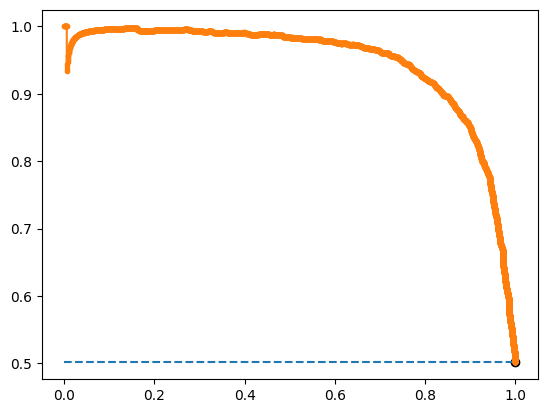

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(rr, p[ix], marker='o', color='black')
plt.show()

### На реальном датасете для бинарной классификации используйте кривые для сравнения нескольких видов моделей между собой (изобразите кривые разных моделей на одном графике). Сделайте вывод о том, какая модель будет лучше работать с учетом оптимизации порога.

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/uestc-chensp/datasets/master/banknote/banknote.csv')
df = pd.DataFrame(data=data)

In [ ]:
X = df.drop(['Class'],axis = 1)
y = data['Class']

In [ ]:
y.unique()

array([1, 2])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=6)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((411, 4), (411,), (961, 4), (961,))

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Байес': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3)}



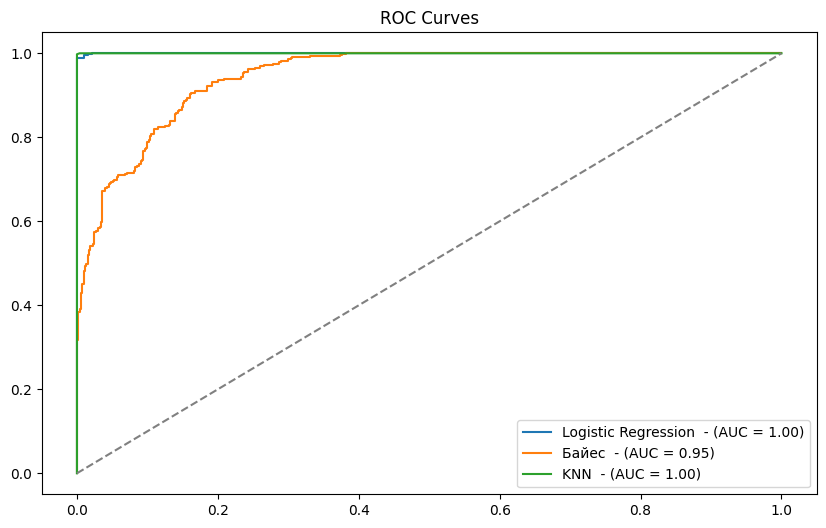

In [ ]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=2)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name}  - (AUC = %0.2f)' %roc_auc)



plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curves')
plt.legend()
plt.show()


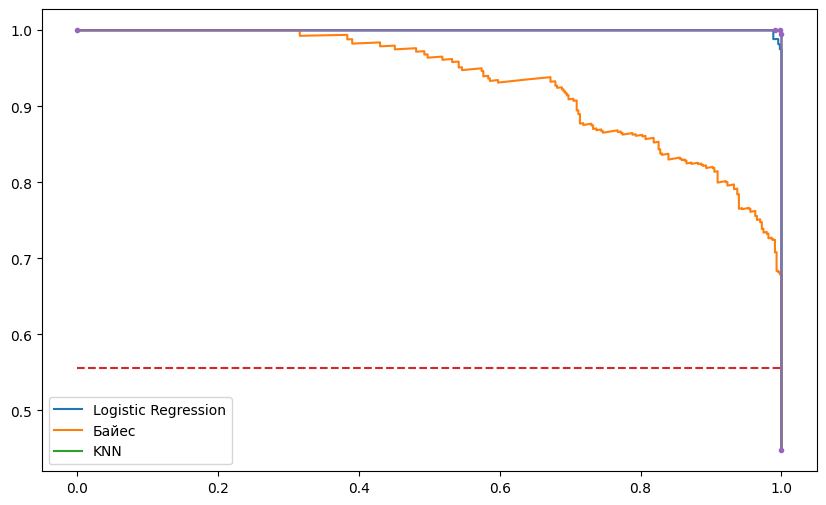

In [ ]:

plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score , pos_label=2)
    plt.plot(recall, precision, label=f'{name}')

no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.legend()
plt.show()



### Повторите предыдущее задание, но для задачи множественной классификации. Выберите два датасета: один с относительно равным распределением классов, а второй - с близким к экспоненциальному, с большим неравенством классов. Продемонтрируйте разницу в поведении моделей на разных кривых.

In [ ]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=3, n_informative=3, n_redundant=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

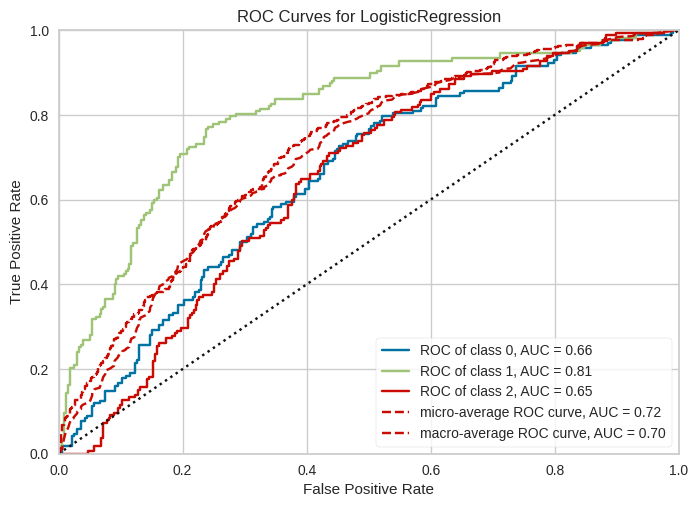

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["0", "1", "2"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


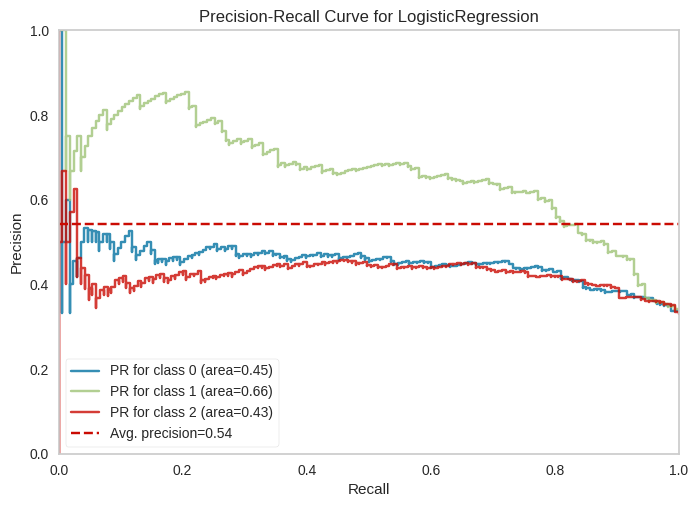

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
viz = PrecisionRecallCurve(model, per_class=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()